In [1]:
import numpy as np
from matplotlib import pyplot as plt

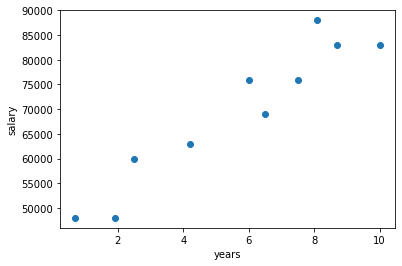

In [2]:
salary_and_year=[[83000,8.7],
[88000,8.1],
[48000,0.7],
[76000,6],
[69000,6.5],
[76000,7.5],
[60000,2.5],
[83000,10],
[48000,1.9],
[63000,4.2]]

data = np.array(salary_and_year)
salaries = data[:, 0]
years = data[:, 1]
plt.scatter(years, salaries)
plt.xlabel('years')
plt.ylabel('salary')
A = np.stack([years, np.ones(years.shape)], axis=1)
s = salaries


In [9]:
guess = np.array([4000, 40000]).astype(float)
print(guess)
s_hat = np.dot(A, guess)
print(s_hat)
print(s)
errors = s - s_hat
error = np.dot(errors.transpose(), errors) / A.shape[0]
print(errors)
print(error)

def compute_error(current_model, A, s):
    errors = s - np.dot(A, current_model)
    return np.dot(errors.transpose(), errors) / A.shape[0]

from functools import partial
compute_error_As = partial(compute_error, A=A, s=s)
print(compute_error_As(current_model=guess))

[ 4000. 40000.]
[74800. 72400. 42800. 64000. 66000. 70000. 50000. 80000. 47600. 56800.]
[83000. 88000. 48000. 76000. 69000. 76000. 60000. 83000. 48000. 63000.]
[ 8200. 15600.  5200. 12000.  3000.  6000. 10000.  3000.   400.  6200.]
67424000.0
67424000.0


In [14]:
# check the gradient by closed form equation: : 2A^Ts + 2A^TAx
(-2 * np.dot(A.transpose(), s) + 2 * np.dot(np.dot(A.transpose(), A), guess)) / A.shape[0]

array([-83928., -13920.])

In [11]:
def sum_of_squares(xs):
    return sum([x * x for x in xs])

def gradient(f, xs, h=1e-6):
    derivs = []
    for i in range(len(xs)):
        xs_ = np.copy(xs)
        xs_[i] += h
        fx2 = f(xs_)
        xs_[i] -= 2*h
        fx1 = f(xs_)
        derivs.append((fx2 - fx1) / (2*h))
    return np.array(derivs)

[ 1000. 10000.] 67424000.0
[ 1662.80221939 10107.58018494] [-662802.21939087 -107580.18493652] 2577689264.339078


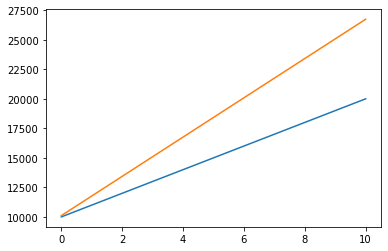

In [12]:
xi = np.array([1000, 10000]).astype(float)
step_size = 1e-3
xis = [xi]
errors = [compute_error_As(current_model=xi)]
print(xi, error)
plt.plot((0, 10), (xi[1], xi[0] * 10 + xi[1]))

for i in range(10000):
    g = gradient (compute_error_As, xi)
    xi = xi - g * step_size
    error = compute_error_As(current_model=xi)
    print (xi, g, error)
    xis.append (xi)
    errors.append(compute_error_As(current_model=xi))
    plt.plot((0, 10), (xi[1], xi[0] * 10 + xi[1]))
    break


[ 1000. 10000.] 2577689264.339078


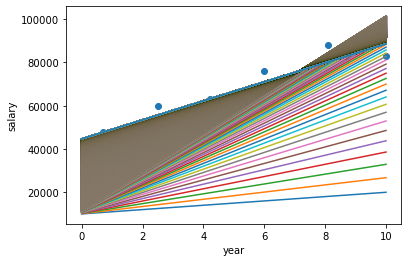

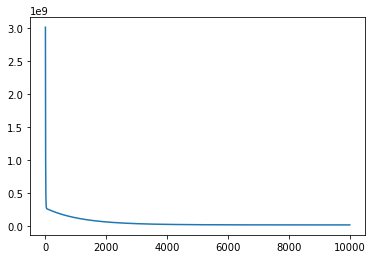

18070492.23893544
[ 4390.26728086 44673.60944487]


In [15]:
xi = np. array([1000, 10000]).astype(float)
step_size = 1e-3
xis = [xi]
errors = [compute_error_As(current_model = xi)]
print(xi, error)
plt.plot((0, 10), (xi[1], xi[0] * 10 + xi[1]))
for i in range(10000):
    g = gradient (compute_error_As, xi)
    xi = xi - g * step_size
    error = compute_error_As(current_model = xi)

    # print(xi, g, error)
    xis.append(xi)
    errors.append(compute_error_As(current_model = xi))
    plt.plot((0, 10), (xi[1], xi[0] * 10 + xi[1]))

plt.scatter(years, salaries)
plt.xlabel('year')
plt.ylabel('salary')
plt.show()
plt.plot (range(len (errors)), errors)
plt.show()
print(errors[-1])
print(xi)